In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer

In [137]:
df = pd.read_csv('../datasets/filtered_dataset.csv')
df

,Id,Overall Qual,Gr Liv Area,Garage Area,Garage Cars,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Full Bath,...,Paved Drive_P,Paved Drive_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,109,6,1479,475.0,2.0,725.0,725,1976,2005,2,...,0,1,0,0,0,0,0,0,0,1
1,544,7,2122,559.0,2.0,913.0,913,1996,1997,2,...,0,1,0,0,0,0,0,0,0,1
2,153,5,1057,246.0,1.0,1057.0,1057,1953,2007,1,...,0,1,0,0,0,0,0,0,0,1
3,318,5,1444,400.0,2.0,384.0,744,2006,2007,2,...,0,1,0,0,0,0,0,0,0,1
4,255,6,1445,484.0,2.0,676.0,831,1900,1993,2,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910,1587,8,1728,520.0,2.0,1884.0,1728,2007,2007,2,...,0,1,0,0,0,0,0,0,0,1
1911,785,4,861,539.0,2.0,861.0,861,1940,1950,1,...,0,1,0,0,0,0,0,0,0,1
1912,916,6,1913,342.0,2.0,896.0,1172,1928,1950,1,...,0,1,0,0,0,0,0,0,0,1
1913,639,4,1200,294.0,1.0,1200.0,1200,1956,1956,1,...,0,1,0,0,0,0,0,0,0,1


In [138]:
top_corr_reduced = df.corr().abs().drop(['Id','SalePrice'])[['SalePrice']].sort_values('SalePrice', ascending=False)

In [139]:
top_corr_reduced[:15].index

Index(['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area',
       'Total Bsmt SF', '1st Flr SF', 'Exter Qual_TA', 'Year Built',
       'Kitchen Qual_TA', 'Full Bath', 'Year Remod/Add', 'Garage Yr Blt',
       'Foundation_PConc', 'TotRms AbvGrd', 'Mas Vnr Area'],
      dtype='object')

In [140]:
# Upper limit of features
np.sqrt(len(df) * .8)

39.14077158156185

In [141]:
top_corr_reduced[top_corr_reduced > .5].dropna()

,SalePrice
Overall Qual,0.794366
Gr Liv Area,0.702046
Garage Cars,0.645888
Garage Area,0.641466
Total Bsmt SF,0.622894
1st Flr SF,0.614517
Exter Qual_TA,0.606371
Year Built,0.559330
Kitchen Qual_TA,0.549933
Full Bath,0.544144


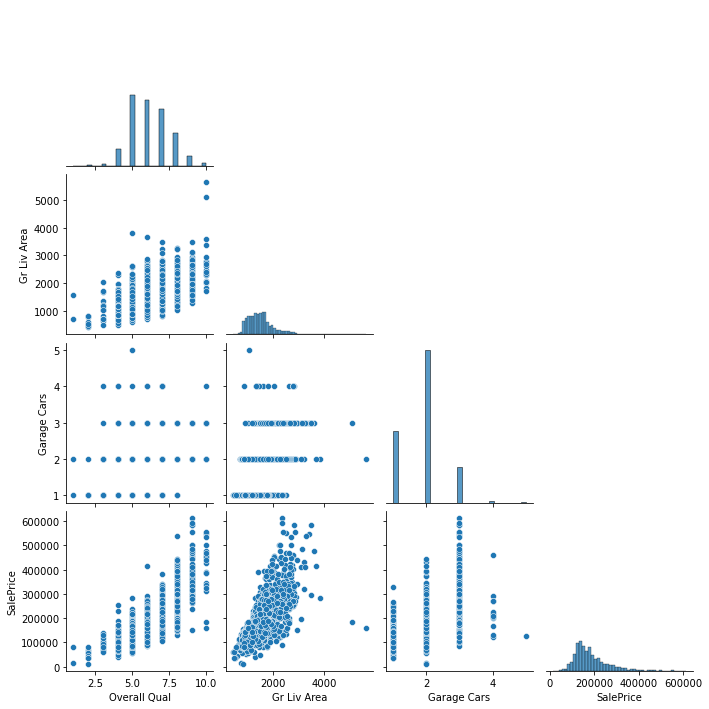

In [142]:
sns.pairplot(df[['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'SalePrice']], corner=True);

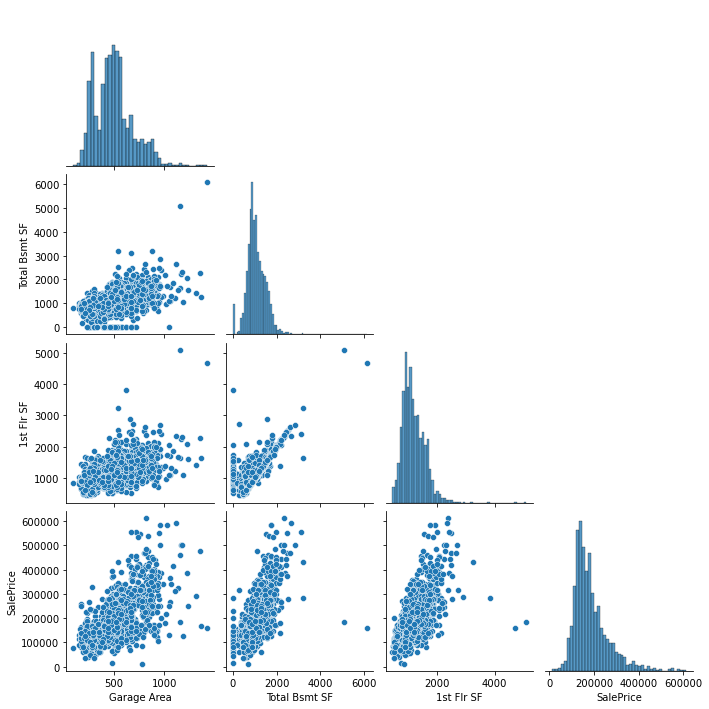

In [143]:
sns.pairplot(df[['Garage Area', 'Total Bsmt SF', '1st Flr SF', 'SalePrice']], corner=True);

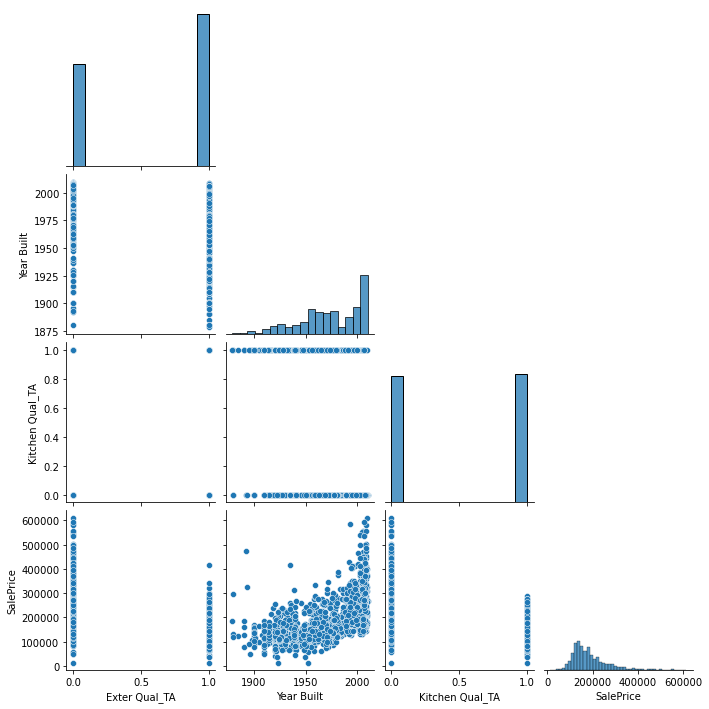

In [144]:
sns.pairplot(df[['Exter Qual_TA', 'Year Built', 'Kitchen Qual_TA', 'SalePrice']], corner=True);

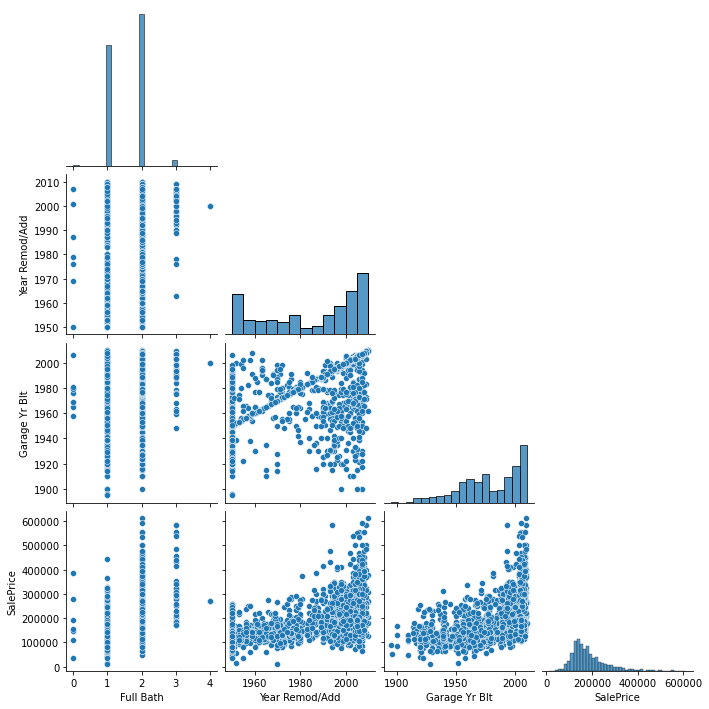

In [145]:
sns.pairplot(df[['Full Bath', 'Year Remod/Add', 'Garage Yr Blt', 'SalePrice']], corner=True);

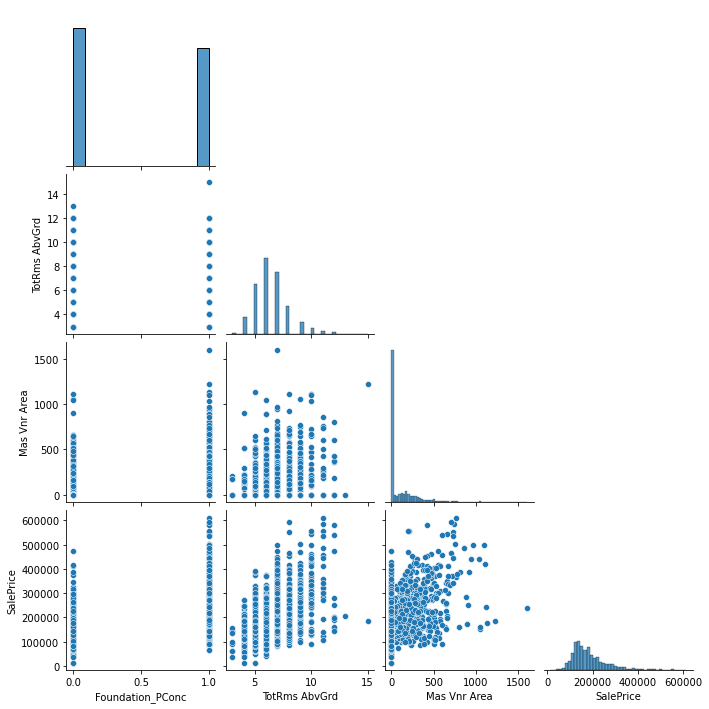

In [146]:
sns.pairplot(df[['Foundation_PConc', 'TotRms AbvGrd', 'Mas Vnr Area', 'SalePrice']], corner=True);

In [191]:
features = top_corr_reduced[top_corr_reduced > .4].dropna().drop(['Garage Yr Blt']).index
features

Index(['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area',
       'Total Bsmt SF', '1st Flr SF', 'Exter Qual_TA', 'Year Built',
       'Kitchen Qual_TA', 'Full Bath', 'Year Remod/Add', 'Foundation_PConc',
       'TotRms AbvGrd', 'Mas Vnr Area', 'Garage Finish_Unf', 'Bsmt Qual_TA',
       'BsmtFin Type 1_GLQ', 'Neighborhood_NridgHt', 'Exter Qual_Gd',
       'Garage Type_Detchd', 'Mas Vnr Type_None'],
      dtype='object')

In [192]:
X = df[features]
y = df['SalePrice']

In [193]:
X.isnull().sum()

Overall Qual            0
Gr Liv Area             0
Garage Cars             0
Garage Area             0
Total Bsmt SF           0
1st Flr SF              0
Exter Qual_TA           0
Year Built              0
Kitchen Qual_TA         0
Full Bath               0
Year Remod/Add          0
Foundation_PConc        0
TotRms AbvGrd           0
Mas Vnr Area            0
Garage Finish_Unf       0
Bsmt Qual_TA            0
BsmtFin Type 1_GLQ      0
Neighborhood_NridgHt    0
Exter Qual_Gd           0
Garage Type_Detchd      0
Mas Vnr Type_None       0
dtype: int64

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [195]:
lr = LinearRegression()

In [196]:
cross_val_score(lr, X_train, y_train).mean()

0.7827571531581512

In [197]:
lr.fit(X_train, y_train)

LinearRegression()

In [198]:
df_kaggle = pd.read_csv('../datasets/filtered_test_dataset.csv')
df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Columns: 146 entries, Id to Sale Type_WD 
dtypes: float64(2), int64(144)
memory usage: 1001.6 KB


In [199]:
X_kaggle = df_kaggle[features].copy()
X_kaggle.isnull().sum().sort_values(ascending=False)

Mas Vnr Area            1
Overall Qual            0
Foundation_PConc        0
Garage Type_Detchd      0
Exter Qual_Gd           0
Neighborhood_NridgHt    0
BsmtFin Type 1_GLQ      0
Bsmt Qual_TA            0
Garage Finish_Unf       0
TotRms AbvGrd           0
Year Remod/Add          0
Gr Liv Area             0
Full Bath               0
Kitchen Qual_TA         0
Year Built              0
Exter Qual_TA           0
1st Flr SF              0
Total Bsmt SF           0
Garage Area             0
Garage Cars             0
Mas Vnr Type_None       0
dtype: int64

In [200]:
X_kaggle.shape

(878, 21)

In [201]:
imp_most = SimpleImputer(strategy='most_frequent')
imp_most.fit(X_train)

SimpleImputer(strategy='most_frequent')

In [202]:
imputed_values = imp_most.transform(X_kaggle)

In [203]:
imputed_X_kaggle = pd.DataFrame(imputed_values, columns=X_kaggle.columns)

In [204]:
pred_kaggle = lr.predict(imputed_X_kaggle)

In [205]:
pred = lr.predict(X_test)

In [206]:
lr.score(X_train, y_train)

0.8010057604664671

In [207]:
lr.score(X_test, y_test)

0.8611482901994708

In [208]:
cross_val_score(lr, X_train, y_train).mean()

0.7827571531581512

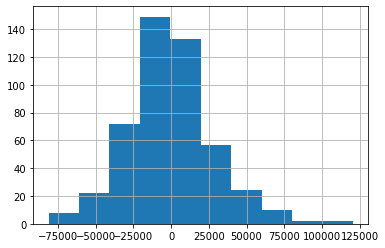

In [209]:
resid = y_test - pred
resid.hist();

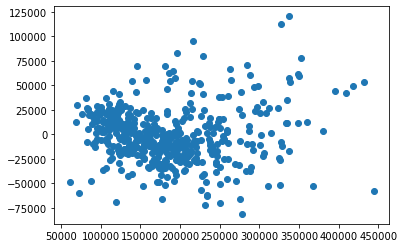

In [210]:
plt.scatter(pred, resid);

In [211]:
df_kaggle['SalePrice'] = pred_kaggle
df_kaggle['SalePrice'].head()

0    158526.825919
1    201360.216362
2    205552.493865
3    123132.850990
4    174207.093261
Name: SalePrice, dtype: float64

In [212]:
submission = df_kaggle[['Id', 'SalePrice']]
submission.set_index('Id', inplace=True)
submission

,SalePrice
Id,
2658,158526.825919
2718,201360.216362
2414,205552.493865
1989,123132.850990
625,174207.093261
...,...
1662,181350.529899
1234,212272.588786
1373,124648.315350


In [213]:
submission.to_csv('../outputs/mlr_6_submission.csv')